<a href="https://colab.research.google.com/github/Mifekmk/SkillTreePython-DeepLearning/blob/main/01.%EB%94%A5%EB%9F%AC%EB%8B%9Dwith%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%EC%9A%B0-basic/ch01_11_CNN%EC%8B%A4%EC%A0%84_%EB%9E%9C%EB%93%9C%EB%A7%88%ED%81%AC%EC%9D%B4%EB%AF%B8%EC%A7%80_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch01.11 CNN실전 - 랜드마크 이미지

* 날짜: 2022-07-19
* 이름: 김민규

## 학습내용
    - 랜드마크 데이터를 이용한 적절한 모델을 구축 및 학습한다.

### 소개

인공지능 기반의 컴퓨터 비전 기술 및 서비스 개발에 활용하기 위해 국내 특성(지리 공간적, 기능적)이 반영된 국내 도심 민간건물, 공공기관, 관광명소, 편의시설 등 국내 도시별 주요 랜드마크 이미지 데이터 구축

### 구축목적
AI 기술 및 응용서비스 개발에 활용가치가 높은 인공지능 학습용 데이터 구축 및 개방, AI응용 서비스 개발
국내 특성(지리 공간적, 기능적)이 반영된 국내 도심 민간건물, 공공기관, 관광명소, 편의시설 등 국내 도시별 주요 랜드마크 이미지 데이터 구축

### AI허브 링크
https://aihub.or.kr/aihubdata/data/view.do?currMenu=115&topMenu=100&aihubDataSe=realm&dataSetSn=56

## 실습
---

#### **데이터로드**
```
! gdown https://drive.google.com/u/0/uc?id=19vsxVITy277RfMTmnY3qE6mH_DOZK7pt&export=download
```

In [1]:
! gdown https://drive.google.com/file/d/19vsxVITy277RfMTmnY3qE6mH_DOZK7pt/view?usp=sharing

/usr/local/lib/python3.7/dist-packages/gdown/parse_url.py:39: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=19vsxVITy277RfMTmnY3qE6mH_DOZK7pt
  url="https://drive.google.com/uc?id={}".format(file_id)
Downloading...
From: https://drive.google.com/file/d/19vsxVITy277RfMTmnY3qE6mH_DOZK7pt/view?usp=sharing
To: /content/view?usp=sharing
69.4kB [00:00, 423kB/s]


In [4]:
! unzip /content/drive/MyDrive/jejudo.zip

Archive:  /content/drive/MyDrive/jejudo.zip
   creating: 골드원호텔&스위트/
  inflating: 골드원호텔&스위트/골든원 호텔&스위트_060_41961619.jpg  
  inflating: 골드원호텔&스위트/골든원 호텔&스위트_061_41961623.jpg  
  inflating: 골드원호텔&스위트/골든원 호텔&스위트_062_41961624.jpg  
  inflating: 골드원호텔&스위트/골든원 호텔&스위트_063_41961625.jpg  
  inflating: 골드원호텔&스위트/골든원 호텔&스위트_064_41961628.jpg  
  inflating: 골드원호텔&스위트/골든원 호텔&스위트_066_41961631.jpg  
  inflating: 골드원호텔&스위트/골든원 호텔&스위트_067_41961636.jpg  
  inflating: 골드원호텔&스위트/골든원 호텔&스위트_068_41961637.jpg  
  inflating: 골드원호텔&스위트/골든원 호텔&스위트_069_41961638.jpg  
  inflating: 골드원호텔&스위트/골든원 호텔&스위트_070_41961640.jpg  
  inflating: 골드원호텔&스위트/골든원 호텔&스위트_071_41961641.jpg  
  inflating: 골드원호텔&스위트/골든원 호텔&스위트_073_41961649.jpg  
  inflating: 골드원호텔&스위트/골든원 호텔&스위트_074_41961654.jpg  
  inflating: 골드원호텔&스위트/골든원 호텔&스위트_075_41961655.jpg  
  inflating: 골드원호텔&스위트/골든원 호텔&스위트_076_41961656.jpg  
  inflating: 골드원호텔&스위트/골든원 호텔&스위트_077_41961657.jpg  
  inflating: 골드원호텔&스위트/골든원 호텔&스위트_078_41961659.jpg  
  inflating: 골드원호텔&스위트/골든원 호텔&스

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
train_gen = ImageDataGenerator(rescale=1.0/255.0, # 0-1로 스케일링
                               validation_split=0.2,
                               width_shift_range = 0.25,
                               height_shift_range = 0.25,
                               rotation_range = 360,
                               shear_range = 0.2,
                               zoom_range = 0.2,
                               horizontal_flip = True,
                               vertical_flip = True,
                               brightness_range = [0.6, 1.4]                               
                               )
valid_gen = train_gen = ImageDataGenerator(rescale=1.0/255.0, # 0-1로 스케일링
                               validation_split=0.2,
                               width_shift_range = 0.25,
                               height_shift_range = 0.25,
                               rotation_range = 360, 
                               )

In [7]:
dir_path = '/content/dataset'
IMG_SHAPE = (180,180)
BATCH_SIZE = 8
SEED = 123
# 같은 디렉토리에서 train-valid 나누고 싶다.
train_ds = train_gen.flow_from_directory(dir_path,
                                         target_size = IMG_SHAPE,
                                         batch_size = BATCH_SIZE,
                                         class_mode = 'categorical',
                                         subset='training',
                                         seed = SEED
                                         )
valid_ds = valid_gen.flow_from_directory(dir_path,
                                         target_size = IMG_SHAPE,
                                         batch_size = BATCH_SIZE,
                                         class_mode = 'categorical',
                                         subset='validation',
                                         seed = SEED
                                         )

Found 1065 images belonging to 8 classes.
Found 263 images belonging to 8 classes.


(8, 180, 180, 3) [[0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]]


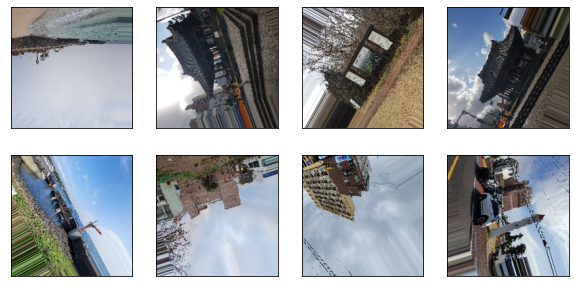

In [8]:
import matplotlib.pyplot as plt

# imgs (batchsize, 180,180,3)
# labels 원-핫 인코딩이 되어있다!!
plt.figure(figsize=(10,5))
for imgs, labels in train_ds:
    print(imgs.shape, labels)
    for i in range(BATCH_SIZE):
        plt.subplot(2,4,i+1)
        plt.xticks([]);plt.yticks([])
        plt.imshow(imgs[i])
    break

## 모델 학습

In [9]:
base_model = tf.keras.applications.EfficientNetB7(weights='imagenet',
                                                  include_top=False,
                                                  input_shape= IMG_SHAPE+(3,))
base_model.summary()

258088960/258076736 [==============================] - 9s 0us/step
Model: "efficientnetb7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 180, 180, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 180, 180, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 180, 180, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 stem_conv_pad (Ze

In [12]:
from tensorflow.keras import layers, models, utils, optimizers

In [14]:
# GlobalAveragePooling  (None, 2560)
# Dropout
# Dense
def create_model(base_model):
  x = layers.Input(shape=IMG_SHAPE+(3,))
  y = base_model(x)
  y = layers.GlobalAvgPool2D()(y)
  y = layers.Dropout(0.5)(y)
  y = layers.Dense(8, activation='softmax')(y)
  return models.Model(x,y)

model = create_model(base_model)
base_model.trainable = True
model.compile(loss = 'categorical_crossentropy',
              optimizer = optimizers.RMSprop(learning_rate=0.0002 ), # 학습률을 작게
              metrics=['acc']) 
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 efficientnetb7 (Functional)  (None, 6, 6, 2560)       64097687  
                                                                 
 global_average_pooling2d (G  (None, 2560)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 2560)              0         
                                                                 
 dense (Dense)               (None, 8)                 20488     
                                                                 
Total params: 64,118,175
Trainable params: 63,807,448
Non-trainable params: 310,727
___________________________________________

In [15]:
from tensorflow.keras import callbacks

save_path = '/content/drive/MyDrive/eff_landmark'
tb = callbacks.TensorBoard(log_dir = f'{save_path}/tb_log')
ckp = callbacks.ModelCheckpoint(filepath=f'{save_path}/model.h5',
                                save_best_only=True,
                                monitor='val_acc'
                                )
TRAIN_STEP = train_ds.n // BATCH_SIZE
VALID_STEP = valid_ds.n // BATCH_SIZE
history = model.fit(train_ds, 
                    validation_data=valid_ds,
                    epochs=20,
                    shuffle=True,
                    callbacks=[tb, ckp],
                    # 계산하기
                    steps_per_epoch = TRAIN_STEP,
                    validation_steps = VALID_STEP,
                    )

Epoch 1/20
133/133 [==============================] - 338s 2s/step - loss: 0.4218 - acc: 0.8827 - val_loss: 2.3379 - val_acc: 0.0977
Epoch 2/20
133/133 [==============================] - 301s 2s/step - loss: 0.1172 - acc: 0.9631 - val_loss: 2.9658 - val_acc: 0.1250
Epoch 3/20
133/133 [==============================] - 293s 2s/step - loss: 0.1037 - acc: 0.9754 - val_loss: 2.6850 - val_acc: 0.2617
Epoch 4/20
133/133 [==============================] - 252s 2s/step - loss: 0.0500 - acc: 0.9858 - val_loss: 3.3535 - val_acc: 0.2969
Epoch 5/20
133/133 [==============================] - 248s 2s/step - loss: 0.0423 - acc: 0.9886 - val_loss: 0.4539 - val_acc: 0.8594
Epoch 6/20
133/133 [==============================] - 238s 2s/step - loss: 0.0461 - acc: 0.9877 - val_loss: 1.0946 - val_acc: 0.7031
Epoch 7/20
133/133 [==============================] - 238s 2s/step - loss: 0.0389 - acc: 0.9886 - val_loss: 0.5137 - val_acc: 0.7891
Epoch 8/20
133/133 [==============================] - 277s 2s/step - 

KeyboardInterrupt: ignored

In [18]:
my_model = models.load_model('/content/dataset')
my_model.summary()

OSError: ignored

In [ ]:
my_model.evaluate(valid_ds)

In [ ]:
class_dict = valid_ds.class_indices
class_dict = {value:key for key, value in class_dict.items()}
class_dict

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

for imgs, labels in valid_ds:
  preds = my_model.predict(imgs)
  print(imgs.shape, labels.shape, preds.shape)

  for i in range(BATCH_SIZE):
    label = np.argmax(labels[i])
    pred = np.argmax(preds[i])
    if label==pred: result='정답!'
    else: result = '오답!'
    print(f'[{result}] "{class_dict[label]}" 을 "{class_dict[pred]}" 라고 {preds[i][pred]*100:.2f}% 확률로 예측하였습니다. ')
    plt.xticks([]);plt.yticks([])
    plt.imshow(imgs[i])
    plt.show()
  break